In [1]:
import pandas as pd
import numpy as np

# Numero delle simulazioni
n = 10000

Vj = 0
Vl = 0
Vi = 0
Va = 0

Pj = np.zeros(n)
Pl = np.zeros(n)
Pi = np.zeros(n)
Pa = np.zeros(n)

for j in range(n):
    Squadre = ['Juventus','Lazio','Inter','Atalanta']
    P = [80,69,72,71]

    col = ['Squadre','P']
    C = pd.DataFrame(columns=col)

    C['P'] = P
    C['Squadre'] = Squadre
    
    GareJ = [7,8,7,5]
    GareL = [7,5,7,3]
    GareI = [6,7,3,-1]
    GareA = [8,5,6,-1]

    RisJ = np.random.rand(len(GareJ))*10
    RisL = np.random.rand(len(GareJ))*10
    RisI = np.random.rand(len(GareJ))*10
    RisA = np.random.rand(len(GareJ))*10

    for i in range(len(GareJ)):
        
        #Juve
        if RisJ[i] == -1:
            pass
        elif RisJ[i] < GareJ[i]:
            P[0] += 3
        elif RisJ[i] < (GareJ[i] + 0.5*(10-GareJ[i])):
            P[0] += 1

        #Lazio
        if RisL[i] == -1:
            pass
        elif RisL[i] < GareL[i]:
            P[1] += 3
        elif RisL[i] < (GareL[i] + 0.5*(10-GareL[i])):
            P[1] += 1

        #Inter
        if RisI[i] == -1:
            pass
        elif RisI[i] < GareI[i]:
            P[2] += 3
        elif RisI[i] < (GareI[i] + 0.5*(10-GareI[i])):
            P[2] += 1
            
        #Atalanta
        if RisA[i] == -1:
            pass
        elif RisA[i] < GareA[i]:
            P[3] += 3
        elif RisA[i] < (GareA[i] + 0.5*(10-GareA[i])):
            P[3] += 1
        
    # Atalanta-Inter 4-3-3
    RisAI = np.random.rand()*10
    if RisAI < 4:
        P[3] += 3
    elif RisAI < 7:
        P[3] += 1
        P[2] += 1
    else:
        P[2] += 3

    # Aggiornare la classifica
    Cf = pd.DataFrame(columns=col)
    Cf['P'] = P
    Cf['Squadre'] = Squadre
    Cf = Cf.sort_values(by='P',ascending=False)
    Cf = Cf.reset_index(drop=True)
    
    if Cf['P'][0] == Cf['P'][1]:
        
        if 'Juventus' in (Cf['Squadre'][0],Cf['Squadre'][1]):
            # Parità Juve-Lazio
            if 'Lazio' in (Cf['Squadre'][0],Cf['Squadre'][1]):
                Vl += 1
                
            # Parità Juve-Inter
            if 'Inter' in (Cf['Squadre'][0],Cf['Squadre'][1]):
                Vj += 1
                
            # Parità Juve-Atalanta
            if 'Atalanta' in (Cf['Squadre'][0],Cf['Squadre'][1]):
                Vj += 1
                
        elif 'Lazio' in (Cf['Squadre'][0],Cf['Squadre'][1]):
            # Parità Lazio-Inter
            if 'Inter' in (Cf['Squadre'][0],Cf['Squadre'][1]):
                Vl += 1
                
            # Parità Lazio-Atalanta
            if 'Atalanta' in (Cf['Squadre'][0],Cf['Squadre'][1]):
                Va += 1
        else:
            # Parità Inter-Atalanta
                if RisAI < 7:
                    Va += 1
                else:
                    Vi += 1
    
    elif Cf['Squadre'][0] == 'Juventus':
        Vj += 1
    elif Cf['Squadre'][0] == 'Lazio':
        Vl += 1
    elif Cf['Squadre'][0] == 'Inter':
        Vi += 1
    elif Cf['Squadre'][0] == 'Atalanta':
        Va += 1

    Pj[j] = P[0]
    Pl[j] = P[1]
    Pi[j] = P[2]
    Pa[j] = P[3]
  
print('Vittoria Juve\n',Vj*100/n)
print('Vittoria Lazio\n',Vl*100/n)
print('Vittoria Inter\n',Vi*100/n)
print('Vittoria Atalanta\n',Va*100/n)

Vittoria Juve
 99.71
Vittoria Lazio
 0.0
Vittoria Inter
 0.12
Vittoria Atalanta
 0.17


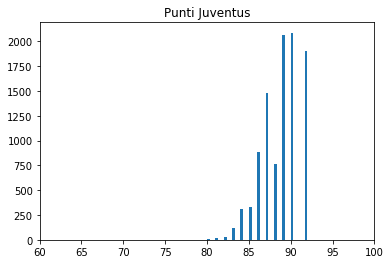

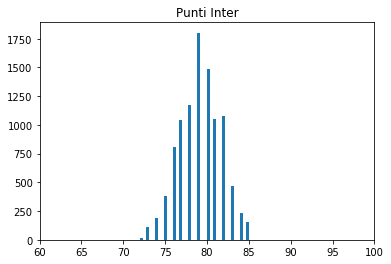

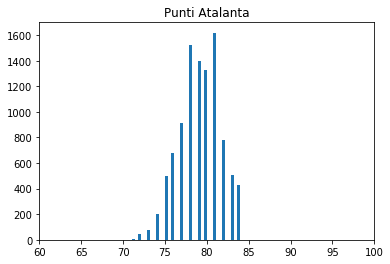

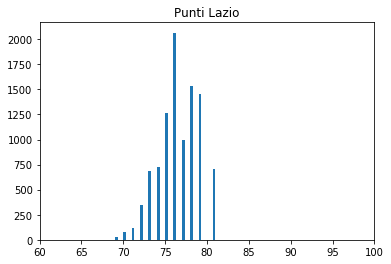

In [5]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.title('Punti Juventus')
plt.hist(Pj,36)
plt.xlim(60,100)
plt.show()

plt.figure(2)
plt.title('Punti Inter')
plt.hist(Pi,36)
plt.xlim(60,100)
plt.show()

plt.figure(3)
plt.title('Punti Atalanta')
plt.hist(Pa,36)
plt.xlim(60,100)
plt.show()

plt.figure(4)
plt.title('Punti Lazio')
plt.hist(Pl,36)
plt.xlim(60,100)
plt.show()

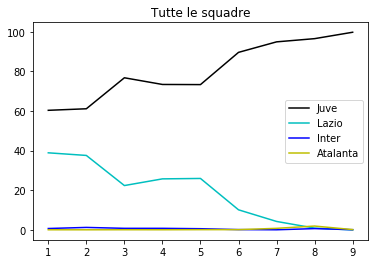

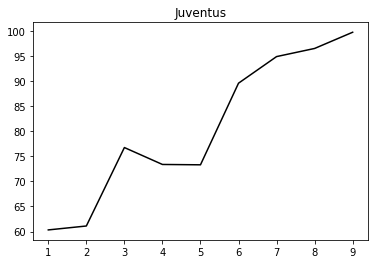

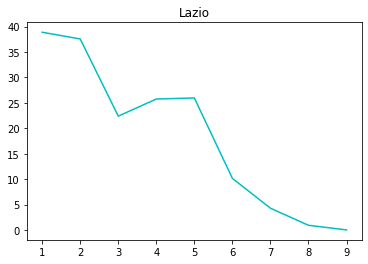

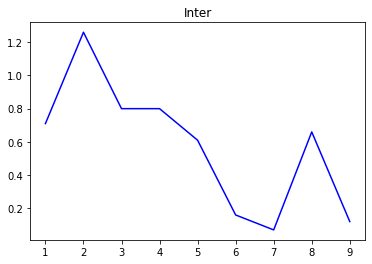

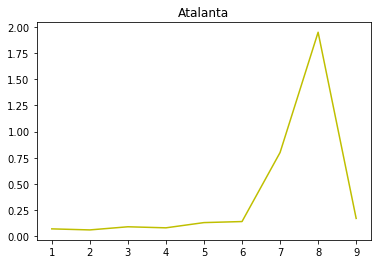

In [3]:
# Grafici andamenti percentuali

juve = [60.33,61.11,76.74,73.37,73.3,89.56,94.86,96.48,99.71]
lazio = [38.89,37.57,22.38,25.75,25.96,10.14,4.27,0.91,0.0]
inter = [0.71,1.26,0.8,0.8,0.61,0.16,0.07,0.66,0.12]
ata = [0.07,0.06,0.09,0.08,0.13,0.14,0.8,1.95,0.17]
g = [1,2,3,4,5,6,7,8,9]


plt.figure(1)
plt.title('Tutte le squadre')
plt.plot(g,juve,label='Juve',c='k')
plt.plot(g,lazio,label='Lazio',c='c')
plt.plot(g,inter,label='Inter',c='b')
plt.plot(g,ata,label='Atalanta',c='y')
plt.legend(loc="best")
plt.show()

plt.figure(2)
plt.title('Juventus')
plt.plot(g,juve,c='k')
plt.show()

plt.figure(3)
plt.title('Lazio')
plt.plot(g,lazio,c='c')
plt.show()

plt.figure(4)
plt.title('Inter')
plt.plot(g,inter,c='b')
plt.show()

plt.figure(5)
plt.title('Atalanta')
plt.plot(g,ata,c='y')
plt.show()

In [8]:
#Converti in quote
print(n/(Vj +0.001))
print(n/(Vl +0.001))
print(n/(Vi +0.001))
print(n/(Va +0.001))

1.0029083338774112
10000000.0
833.2638946754438
588.200694076819
